# React Agent with Multiple Custom Tools

- In this Code we will build a LangGraph workflow that deals with Multiple Tools. 

In [2]:
#Importing required library 
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [3]:
#Loading the API Key and building base model 
from dotenv import load_dotenv
load_dotenv(override=True)
import os 
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
##Selecting the model 
model = "deepseek-r1-distill-llama-70b"
## Building the base model using Gorq
from langchain_groq import ChatGroq
llm=ChatGroq(model_name=model, temperature=0)

In [4]:
#Check the functionality of the llm
response=llm.invoke("Tallest building in the world ")
response.content

'<think>\n\n</think>\n\nAs of now, the tallest building in the world is the **Burj Khalifa** in Dubai, United Arab Emirates. It stands at an incredible height of **828 meters (2,717 feet)** and has held this title since its completion in 2010. The Burj Khalifa is not only the tallest building but also holds several other records, including the tallest structure, highest observation deck, and the elevator with the longest travel distance in the world.'

In [5]:
#The focus is to build custom tools. 
from langchain.tools import tool 

@tool 
def multiply(a: int, b: int) -> int:
    """" 
    It receives two inputs integers and Multiply those inputs.  
    Args: 
        a (int) : First Integer 
        b (int) : Second Integer  
    
    Returns:
        integer : A Product of a and b  
    """    
    return a * b 

@tool 
def add(a: int, b: int ) -> int:
    """ 
    Adds two integers. 
    Args: 
        a (int) : First Integer 
        b (int) : Second Integer  
    Returns: 
        int : The sub of a and b 
    """
    return a + b 

@tool 
def divide(a: int, b:int ) -> float: 
    """ 
    Divide two integers. 
    
    Args: 
        a (int) : First integer 
        b (int) : Second integer 
    
    Returns: 
        float : The result of division. 
        
    """
    
    if b == 0:
        raise ValueError("Denominator cannot be zero")
    
    return a / b 
 
    

Leveraging Inbuild Tool

- Duckduckgo : It will crawl through the internet and provide a summary of the content from Top Search Result.

In [6]:
#Importing Duck Duck go Search 
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [7]:
#Check the functionality of Duck DuckGoSearchRun 
search.invoke("When is the release date for Sony RX1 III in Singapore?")

c:\Users\emelvis\10.VS_Code\04_AgenticAI\agenticenv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


'Jul 16, 2025 · The Sony RX1R III will be available in Singapore sometime in August. Pricing has yet to be determined, but given that the RX1R II had a launch price of S$4,999, it’s safe to … Jul 15, 2025 · Sony has announced the RX1R III, the highly anticipated third generation of the company’s beloved premium full-frame all-in-one camera series. The premium compact RX1R … Jul 15, 2025 · The Sony RX1R III will be available from July 2025, priced at approximately $5,099.99 USD (about £3,999). Accessories including the TG-2 thumb grip, LCS-RXL body … Jul 15, 2025 · "The RX1R III combines Sony’s design savvy with the latest innovations in imaging technology to produce a new flagship in our RX1R camera series that offers uncompromising … Jul 16, 2025 · The RX1R III will be available in July 2025 for about 4,900 euros or 4,200 pounds. Optional accessories will follow in September. These include the TG-2 thumb grip at 280 …'

In [8]:
#Consolidating the tools 
tools = [multiply, add, divide, search]

#Binding tools with LLM 
llm_with_tools = llm.bind_tools(tools)

In [9]:
tools

[StructuredTool(name='multiply', description='" \n    It receives two inputs integers and Multiply those inputs.  \n    Args: \n        a (int) : First Integer \n        b (int) : Second Integer  \n\n    Returns:\n        integer : A Product of a and b', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001F204B8FD80>),
 StructuredTool(name='add', description='Adds two integers. \nArgs: \n    a (int) : First Integer \n    b (int) : Second Integer  \nReturns: \n    int : The sub of a and b', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001F20469BBA0>),
 StructuredTool(name='divide', description='Divide two integers. \n\nArgs: \n    a (int) : First integer \n    b (int) : Second integer \n\nReturns: \n    float : The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001F204E96F20>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(reg

In [10]:
#Testing the llm_with_tools 
response = llm_with_tools.invoke("Hello")

#Checking the response 
print("Content from the LLM_With_tool response ", response.content)

#Checking the tool_calls output of last response
print("Tool Calls output from last response", response.tool_calls)

Content from the LLM_With_tool response  Hello! How can I assist you today?
Tool Calls output from last response []


In [11]:
#Testing further samples 
response = llm_with_tools.invoke("What is 2+2")

#Checking the response content 
print("Content from the LLM_With_tool response ", response.content)

#Checking the tool_calls output of last response
print("Tool Calls output from last response", response.tool_calls)

Content from the LLM_With_tool response  
Tool Calls output from last response [{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'hxnckyk2g', 'type': 'tool_call'}]


In [12]:
#Testing further samples 
response = llm_with_tools.invoke("How old is TATA Group?")

#Checking the response content 
print("Content from the LLM_With_tool response ", response.content)

#Checking the tool_calls output of last response
print("Tool Calls output from last response", response.tool_calls)

Content from the LLM_With_tool response  The TATA Group was founded in 1868 by Jamsetji Tata. As of 2023, it is 155 years old.

**Step-by-Step Explanation:**

1. **Identify the Founder:** The TATA Group was founded by Jamsetji Tata.
2. **Determine the Founding Year:** The group was established in 1868.
3. **Calculate the Age:** As of 2023, subtract 1868 from 2023 to find the age.
4. **Result:** 2023 - 1868 = 155 years.

**Answer:** The TATA Group is 155 years old as of 2023.
Tool Calls output from last response []


In [13]:
response.tool_calls

[]

In [14]:
#DEfining a System Prompt 

SYSTEM_PROMPT = "You are a helpful assistant tasked with using Search and performing Arithmatic operation on the set of inputs "

In [15]:
#User Query 
user_query = ["Tell me what is 2+2?"]

In [16]:
#Combined prompt 
[SYSTEM_PROMPT] + user_query

['You are a helpful assistant tasked with using Search and performing Arithmatic operation on the set of inputs ',
 'Tell me what is 2+2?']

In [17]:
#Defining the base llm that recieved the user input and perform Reasoning

def function_1(state: MessagesState):
    
    user_question = state["messages"] #Getting user question from messagestate 
    
    input_question = [SYSTEM_PROMPT] + user_question  #Merging input with system prompt 
    
    response = llm_with_tools.invoke(input_question)
    
    return { "messages" : [response] }
    
    

In [18]:
#Adding ToolNode to be included within the LangGraph node 
from langgraph.prebuilt import ToolNode


In [19]:
#Defining the workflow 
from langchain_core.messages import HumanMessage, SystemMessage 
from langgraph.graph import MessagesState, StateGraph, END, START

#Building the workflow 
builder = StateGraph(MessagesState)

#Adding nodes 
builder.add_node("llm_decision_step", function_1) #Add reasoning node. 
builder.add_node("tools",ToolNode(tools))

#Adding Edges
builder.add_edge(START, "llm_decision_step")

In [20]:
#Need to add a Conditional node 
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition
)

In [21]:
#Need to add the feedback loop 
builder.add_edge("tools", "llm_decision_step")

In [22]:
#React Graph
react_graph = builder.compile()

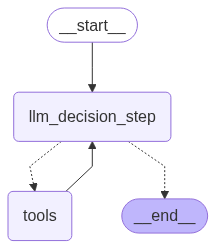

In [23]:
#Display the graph 
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [24]:
#Testing the workflow
input = [HumanMessage(content="What is the age of Narendra Modi multiplied by 2?")] 
react_graph.invoke({"messages": input})

c:\Users\emelvis\10.VS_Code\04_AgenticAI\agenticenv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='What is the age of Narendra Modi multiplied by 2?', additional_kwargs={}, response_metadata={}, id='3a9e1443-f7c7-4522-b091-66b5a5108a19'),
  AIMessage(content='To find the age of Narendra Modi multiplied by 2, I will first look up his current age using the DuckDuckGo search tool. Once I have his age, I will use the multiply function to calculate the result.\n\n', additional_kwargs={'reasoning_content': 'Okay, so I need to figure out the age of Narendra Modi and then multiply it by 2. First, I should find out how old he is. I know he\'s the Prime Minister of India, but I\'m not exactly sure of his current age. Maybe I can look that up. Let me search for "Narendra Modi age" to get the most accurate information.\n\nOnce I have his age, the next step is to multiply that number by 2. That should be straightforward. I\'ll take the age, which is a number, and perform the multiplication. \n\nWait, I should make sure I\'m using the correct age. Sometimes, so

In [25]:
#Testing the workflow
input = [HumanMessage(content="What is the worth of Barak Obama?")] 
react_graph.invoke({"messages": input})

c:\Users\emelvis\10.VS_Code\04_AgenticAI\agenticenv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='What is the worth of Barak Obama?', additional_kwargs={}, response_metadata={}, id='70d2d880-5c32-4334-8939-c721dede6554'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking about the worth of Barack Obama. I know that "worth" could refer to his net worth, so I should look that up. I\'ll use the DuckDuckGo tool to search for the most recent and accurate information on his net worth. Once I have that data, I can provide a clear and helpful response to the user.\n', 'tool_calls': [{'id': 'mk9919k4k', 'function': {'arguments': '{"query":"Barack Obama net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 111, 'prompt_tokens': 438, 'total_tokens': 549, 'completion_time': 0.531280759, 'prompt_time': 0.03575642, 'queue_time': 0.282178891, 'total_time': 0.567037179}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_5d7b

In [30]:
input = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
react_graph.invoke({"messages": input})

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='19f96c2c-d2f9-449d-8e8b-d0d018807f46'),
  AIMessage(content='The speed of light in meters per second is approximately 299,792,000 m/s. Multiplying this by 10 gives:\n\n', additional_kwargs={'reasoning_content': "Okay, so the user is asking for the speed of light in meters per second and then to multiply that by 10. First, I need to find the speed of light. I remember that the speed of light is a constant, but I'm not exactly sure of the exact number. I think it's approximately 299,792 kilometers per second, but since the user wants it in meters per second, I should convert that. \n\nWait, 1 kilometer is 1000 meters, so if it's 299,792 km/s, then in meters per second, it would be 299,792,000 m/s. Let me double-check that. Yeah, that makes sense because multiplying by 1000 moves the decimal three places to the right.\n\nNow, the user also wants to

In [27]:

response=react_graph.invoke({"messages": input})

In [28]:
response["messages"][-1].content

'The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is 2,997,920,000 meters per second.\n\n**Step-by-Step Explanation:**\n\n1. **Identify the Speed of Light:**\n   - The speed of light in a vacuum is a constant value.\n   - It is approximately 299,792 kilometers per second.\n\n2. **Convert Kilometers to Meters:**\n   - Since 1 kilometer equals 1,000 meters, multiply the speed by 1,000 to convert it to meters per second.\n   - Calculation: 299,792 km/s * 1,000 = 299,792,000 m/s.\n\n3. **Multiply by 10:**\n   - To find the speed multiplied by 10, simply add a zero to the end of the number.\n   - Calculation: 299,792,000 m/s * 10 = 2,997,920,000 m/s.\n\n**Final Answer:**\nThe speed of light is 299,792,000 meters per second, and when multiplied by 10, it becomes 2,997,920,000 meters per second.'

In [31]:
#Display the result 
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================

The speed of light in meters per second is approximately 299,792,000 m/s. Multiplying this by 10 gives:
Tool Calls:
  multiply (7bsktnq4t)
 Call ID: 7bsktnq4t
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light in meters per second is approximately **299,792,458 m/s**. When multiplied by 10, the result is:
Tool Calls:
  multiply (xt1bb44bm)
 Call ID: xt1bb44bm
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================


Extending the functionality by including a tool that can determine the stock price for a given company. 

In [32]:
import yfinance as yf


In [33]:
@tool 

def get_stock_price(ticker: str) -> str : 
    """ 
    Fetches the previous closing price of a given stock ticker from Yahoo Finance. 
    
    Args:
        ticker (str) : The stock ticket symbol (eg: 'APPL', 'TSLA' etc )
    
    Returns: 
        str : A message with stock's previous closing price.     
    """
    
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch for the ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occured while fetching stock data {str(e)}"

In [ ]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     

In [34]:
get_stock_price.invoke("AAPL")


'The last closing price of AAPL was $214.40.'

In [35]:
get_stock_price.invoke("TSLA")


'The last closing price of TSLA was $332.11.'

In [36]:
#Modifying tools to include get stock price tool
tools = [add, multiply, divide, search, get_stock_price]

#Binding tools with LLM 
llm_with_tools = llm.bind_tools(tools)


In [37]:
#Testing the llm_with tools 

response = llm_with_tools.invoke("Tell me the stock price of Microsoft?")

print("Content Generated by LLM", response.content)

print("Output of tool calls", response.tool_calls)

Content Generated by LLM 
Output of tool calls [{'name': 'get_stock_price', 'args': {'ticker': 'MSFT'}, 'id': 'd2et2901d', 'type': 'tool_call'}]


In [38]:
#modifuing the system prompt to include the ability to obtained stock price information 
SYSTEM_PROMPT= SystemMessage(content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs")



In [39]:
#Defining the base llm that recieved the user input and perform Reasoning

def function_1(state: MessagesState):
    
    user_question = state["messages"] #Getting user question from messagestate 
    
    input_question = [SYSTEM_PROMPT] + user_question  #Merging input with system prompt 
    
    response = llm_with_tools.invoke(input_question)
    
    return { "messages" : [response] }
    
    

In [41]:
#Creating the workflow 

workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))

#Adding edges 
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step", 
    tools_condition
)

#Feedback loop 
workflow.add_edge("tools", "llm_decision_step")

#App 
react_graph2 = workflow.compile()


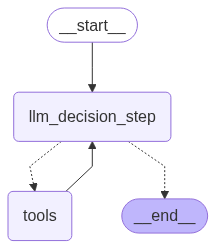

In [42]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (nm9vs1jpr)
 Call ID: nm9vs1jpr
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $214.40.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (nr6amdn6m)
 Call ID: nr6amdn6m
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $214.40.
================================== Ai Message ==================================

The last closing price of AAPL was $214.40. Adding 1000 to this price gives:

1000 + 214.40 = 1214.40

So, the result is **$1,214.40**.


In [46]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple. Also share the latest news about Apple")]
messages = react_graph2.invoke({"messages": messages})

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `deepseek-r1-distill-llama-70b` in organization `org_01j7e5xbtkf0t9rt7gw89k0b37` service tier `on_demand` on tokens per day (TPD): Limit 100000, Used 99930, Requested 222. Please try again in 2m11.074999999s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [50]:
messages = [HumanMessage(content="What is the stock price of apple company?")]
messages = react_graph2.invoke({"messages": messages})

In [51]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the stock price of apple company?
================================== Ai Message ==================================

To get the stock price of Apple, I'll use the get_stock_price tool with the ticker symbol "AAPL".
Tool Calls:
  get_stock_price (t9z8m9c6r)
 Call ID: t9z8m9c6r
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $214.40.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (9e50m8s95)
 Call ID: 9e50m8s95
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $214.40.
================================== Ai Message ==================================

The last closing price of AAPL was $214.40.
